<a href="https://colab.research.google.com/github/franconoronha/treinamento-h2ia/blob/main/5_Algoritmo_Gen%C3%A9tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Algoritmo Genético**

## Problema da Mochila
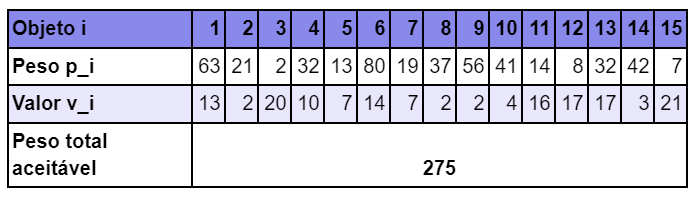

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import floor

rng = np.random.default_rng()
pesos = np.array([63,21,2,32,13,80,19,37,56,41,14,8,32,42,7])
valores = np.array([13,2,20,10,7,14,7,2,2,4,16,17,17,3,21])

class Mochila:
  def __init__(self, objetos):
    self.objetos = objetos
    self.peso = np.sum(pesos * objetos)
    self.valor = np.sum(valores * objetos)

In [ ]:
def gerar_populacao(TAM_POPULACAO):
  populacao = []
  for x in range(0,TAM_POPULACAO):
    populacao.append(Mochila(rng.integers(2, size=15)))
  return populacao

In [ ]:
def crossover(mochila_1, mochila_2):
  ponto_corte = np.random.randint(1,len(mochila_1.objetos))
  #ponto_corte = np.random.randint(4,len(mochila_1.objetos)-4)

  objetos_filho_1 = np.copy(mochila_1.objetos)
  objetos_filho_1[ponto_corte:] = mochila_2.objetos[ponto_corte:]

  objetos_filho_2 = np.copy(mochila_2.objetos)
  objetos_filho_2[ponto_corte:] = mochila_1.objetos[ponto_corte:]

  return (Mochila(objetos_filho_1), Mochila(objetos_filho_2))

def mutacao(mochila, TAXA_MUTACAO):
  if np.random.random_sample() < TAXA_MUTACAO:
    gene = np.random.randint(len(mochila.objetos))
    mochila.objetos[gene] = 1 - mochila.objetos[gene]

In [ ]:
def algoritmo_genetico(populacao, MAX_GERACAO, TAXA_MUTACAO):
  nova_populacao = []
  melhor_da_geracao = []
  melhor_da_geracao_2 = []
  media_geracao = []
  media_geracao_2 = []

  for i in range(0, MAX_GERACAO):
    nova_populacao = []

    array_valores = np.array([x.valor for x in populacao])
    soma_valores = np.sum(array_valores)

    for i, val in enumerate(array_valores): # os valores estavam tendendo ao maior valor possivel
      if(populacao[i].peso <= 275):         # ultrapassando o limite de peso
        array_valores[i] += 100             # então eu aumentei as chances de reprodução das soluções com peso válido
        soma_valores += 100              
      
    array_pesos = array_valores / soma_valores

    ##### gráficos
    melhor_da_geracao.append(np.max(array_valores))
    media_geracao.append(np.average(array_valores))

    populacao_filtrada = np.array([x.valor for x in populacao if x.peso <= 275])
    if len(populacao_filtrada) > 0:
      melhor_da_geracao_2.append(np.max(populacao_filtrada))
      media_geracao_2.append(np.average(populacao_filtrada))
    else: 
      melhor_da_geracao_2.append(0)
      media_geracao_2.append(0)
    #####

    for j in range(0, floor(len(populacao) / 2)):
      pai_1 = pai_2 = rng.choice(populacao, p=array_pesos)
      while pai_1 == pai_2:
        pai_2 = rng.choice(populacao, p=array_pesos) # garantir que os pais n são iguais
        # talvez não seja necessário
      
      #add chance de crossover
      filhos = crossover(pai_1, pai_2)
      for f in filhos:
        mutacao(f, TAXA_MUTACAO)
      nova_populacao.extend(filhos)

    del populacao[:]
    populacao = nova_populacao
  return populacao, melhor_da_geracao, melhor_da_geracao_2, media_geracao, media_geracao_2

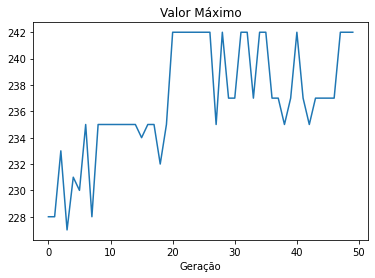

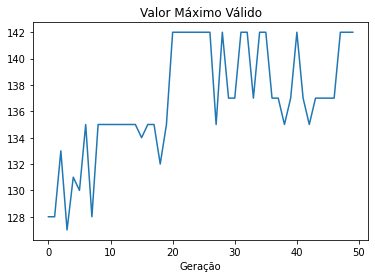

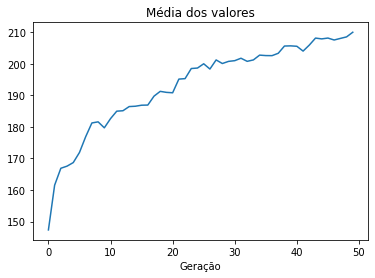

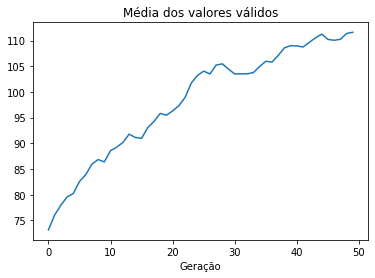

In [ ]:
TAM_POPULACAO = 500
MAX_GERACAO = 50
TAXA_MUTACAO = 0.05

populacao = gerar_populacao(TAM_POPULACAO)
populacao, melhor_da_geracao, melhor_da_geracao_2, media_geracao, media_geracao_2 = algoritmo_genetico(populacao, MAX_GERACAO, TAXA_MUTACAO)
populacao_filtrada = [x for x in populacao if x.peso <= 275]

x = range(0, len(melhor_da_geracao))

plt.title("Valor Máximo")
plt.xlabel("Geração")
plt.plot(x, melhor_da_geracao)
plt.show()

plt.title("Valor Máximo Válido") # as vezes o valor max válido cai por um tempo
# talvez seja melhor garantir que algumas soluções boas não "morram"
plt.xlabel("Geração")
plt.plot(x, melhor_da_geracao_2)
plt.show()

plt.title("Média dos valores")
plt.xlabel("Geração")
plt.plot(x, media_geracao)
plt.show()

plt.title("Média dos valores válidos")
plt.xlabel("Geração")
plt.plot(x, media_geracao_2)
plt.show()

In [ ]:
populacao_filtrada = sorted(populacao_filtrada, key=lambda e: e.valor)

melhor = populacao_filtrada.pop()
print("Melhor solução atual")
print(melhor.objetos)
print(melhor.valor)

Melhor solução atual
[1 0 1 1 1 1 1 0 0 0 1 1 1 0 1]
142
